In [6]:
import numpy as np

data = np.load('output/weather_3d_20251221_024235.npz')

# 交互式探索
data.files          # 查看所有数组名
data['weather_3d']  # 直接访问数组

array([[[ 1.0078e+02,  9.2380e+01,  1.5230e+01, ...,  1.4620e+01,
          1.8730e+01,  5.5700e+00],
        [ 9.9870e+01,  7.9440e+01,  1.4120e+01, ...,  1.2230e+01,
          1.9180e+01,  5.4600e+00],
        [ 1.0089e+02,  7.0620e+01,  1.0160e+01, ...,  7.4700e+00,
          1.7190e+01,  2.0000e-02],
        ...,
        [ 1.0219e+02,  8.0310e+01,  1.0350e+01, ...,  8.6500e+00,
          1.7530e+01,  1.2850e+01],
        [ 1.0219e+02,  8.0310e+01,  1.0350e+01, ...,  8.6500e+00,
          1.7530e+01,  1.2850e+01],
        [ 1.0219e+02,  8.0310e+01,  1.0350e+01, ...,  8.6500e+00,
          1.7530e+01,  1.2850e+01]],

       [[ 1.0053e+02,  9.1060e+01,  1.7430e+01, ...,  1.6690e+01,
          2.2120e+01,  1.2060e+01],
        [ 1.0020e+02,  8.7060e+01,  1.8980e+01, ...,  1.7770e+01,
          2.5350e+01,  9.1000e-01],
        [ 1.0000e+02,  8.6000e+01,  1.6820e+01, ...,  1.5530e+01,
          2.2990e+01,  4.9200e+00],
        ...,
        [ 1.0067e+02,  9.1880e+01,  2.1200e+01, ...,  

# NPZ 文件切片查看

3D 数组的维度: `(样本数, 时间步数, 特征数)` = `(23, 259, 11)`

切片方式：
- `weather_3d[样本索引, 时间索引, 特征索引]`
- 使用 `:` 表示取所有
- 使用 `start:end` 表示取范围

首先获取基本信息：

In [7]:
# 获取基本信息（先运行这个 cell）
import pandas as pd

feature_names = data['feature_names']
sample_ids = data['sample_ids']
weather_3d = data['weather_3d']

print(f"数据形状: {weather_3d.shape}")
print(f"样本数: {len(sample_ids)}")
print(f"特征数: {len(feature_names)}")
print(f"\n所有特征: {list(feature_names)}")
print(f"\n所有样本: {list(sample_ids)}")

数据形状: (23, 259, 11)
样本数: 23
特征数: 11

所有特征: [np.str_('PS'), np.str_('RH2M'), np.str_('T2MWET'), np.str_('T2M'), np.str_('WS2M'), np.str_('ALLSKY_SFC_SW_DWN'), np.str_('QV2M'), np.str_('T2M_MIN'), np.str_('T2MDEW'), np.str_('T2M_MAX'), np.str_('PRECTOTCORR')]

所有样本: [np.str_('DEH1_2024'), np.str_('GAH1_2024'), np.str_('GAH2_2024'), np.str_('IAH2_2024'), np.str_('IAH4_2024'), np.str_('ILH1_2024'), np.str_('INH1_2024'), np.str_('MIH1_2024'), np.str_('MNH1_2024'), np.str_('MOH1_2024'), np.str_('NCH1_2024'), np.str_('NEH1_2024'), np.str_('NEH2_2024'), np.str_('NEH3_2024'), np.str_('NYH2_2024'), np.str_('NYH3_2024'), np.str_('OHH1_2024'), np.str_('ONH3_2024'), np.str_('SCH1_2024'), np.str_('TXH1_2024'), np.str_('WIH1_2024'), np.str_('WIH2_2024'), np.str_('WIH3_2024')]


In [8]:
# 1. 查看第1个样本（环境）的所有时间步的所有特征
sample_0_all = weather_3d[0, :, :]
print(f"第1个样本的完整数据: {sample_0_all.shape}")
print(f"含义: 259个时间步 × 11个特征")
print("\n前3个时间步:")
print(sample_0_all[:3, :])

第1个样本的完整数据: (259, 11)
含义: 259个时间步 × 11个特征

前3个时间步:
[[1.0078e+02 9.2380e+01 1.5230e+01 1.5850e+01 5.8800e+00 9.6500e+00
  1.0380e+01 1.3160e+01 1.4620e+01 1.8730e+01 5.5700e+00]
 [9.9870e+01 7.9440e+01 1.4120e+01 1.5990e+01 6.0900e+00 1.5450e+01
  9.0300e+00 1.1980e+01 1.2230e+01 1.9180e+01 5.4600e+00]
 [1.0089e+02 7.0620e+01 1.0160e+01 1.2860e+01 5.6200e+00 2.1920e+01
  6.4100e+00 8.8100e+00 7.4700e+00 1.7190e+01 2.0000e-02]]


In [ ]:
# 2. 查看所有样本在第1个时间步的数据（第1天的快照）
all_samples_time_0 = weather_3d[:, 0, :]
print(f"所有样本第1天的数据: {all_samples_time_0.shape}")
print(f"含义: 23个样本 × 11个特征")
print("\n前3个样本:")
print(all_samples_time_0[:3, :])

所有样本第1天的数据: (23, 11)
含义: 23个样本 × 11个特征

前3个样本:
[[1.0078e+02 9.2380e+01 1.5230e+01 1.5850e+01 5.8800e+00 9.6500e+00
  1.0380e+01 1.3160e+01 1.4620e+01 1.8730e+01 5.5700e+00]
 [1.0053e+02 9.1060e+01 1.7430e+01 1.8180e+01 2.0500e+00 1.4850e+01
  1.2020e+01 1.2900e+01 1.6690e+01 2.2120e+01 1.2060e+01]
 [9.9520e+01 8.5810e+01 1.8690e+01 2.0040e+01 5.0000e-02 1.2210e+01
  1.2510e+01 1.5650e+01 1.7360e+01 2.5480e+01 1.6000e-01]]


In [ ]:
# 3. 查看第1个样本、前10天、第1个特征（PS-气压）的时间序列
sample_0_time_0to10_feature_0 = weather_3d[0, :10, 0]
print(f"第1个样本前10天的气压变化: {sample_0_time_0to10_feature_0.shape}")
print(f"含义: 10个时间步的气压值")
print("\n气压时间序列:")
print(sample_0_time_0to10_feature_0)

第1个样本前10天的气压变化: (10,)
含义: 10个时间步的气压值

气压时间序列:
[100.78  99.87 100.89 101.19 100.93 101.89 101.62 101.41 101.71 101.33]


In [ ]:
# 4. 查看特定样本、特定时间段、特定特征的组合
# 查看第1个样本（DEH1_2024）前5天的温度相关特征
sample_idx = 0
time_range = slice(0, 5)
temp_features = [3, 7, 8, 9]  # T2M, T2M_MIN, T2MDEW, T2M_MAX

temp_data = weather_3d[sample_idx, time_range, temp_features]

# 用 DataFrame 展示
df = pd.DataFrame(
    temp_data,
    columns=[feature_names[i] for i in temp_features],
    index=[f'第{i+1}天' for i in range(5)]
)

print(f"样本: {sample_ids[sample_idx]}")
print(f"\n前5天的温度数据:")
print(df)

ValueError: Shape of passed values is (4, 5), indices imply (5, 4)

In [ ]:
# 5. 查看多个样本的对比（前3个环境的第1天数据）
first_3_samples_day1 = weather_3d[:3, 0, :]

df_compare = pd.DataFrame(
    first_3_samples_day1,
    columns=feature_names,
    index=sample_ids[:3]
)

print("前3个环境在第1天的天气对比:")
print(df_compare)

## 切片总结

常用切片模式：

1. **单个样本的完整时间序列**: `data['weather_3d'][0, :, :]` → (259, 11)
2. **所有样本某一天的快照**: `data['weather_3d'][:, 0, :]` → (23, 11)  
3. **单个特征的时间序列**: `data['weather_3d'][0, :, 0]` → (259,)
4. **特定样本+时间+特征**: `data['weather_3d'][0, 0:5, 3]` → (5,)
5. **多样本对比**: `data['weather_3d'][0:3, 0, :]` → (3, 11)

索引规则：
- `[样本索引, 时间索引, 特征索引]`
- 索引从 0 开始
- 使用 `:` 取全部
- 使用 `start:end` 取范围（不包含 end）

## 查看所有时间步

查看第1个样本（DEH1_2024）的完整时间序列：

In [9]:
# 6. 查看第1个样本的所有时间步（259天）
sample_0_all_time = weather_3d[0, :, :]  # 形状: (259, 11)

print(f"样本: {sample_ids[0]}")
print(f"数据形状: {sample_0_all_time.shape}")
print(f"时间步数: {sample_0_all_time.shape[0]} 天")
print(f"特征数: {sample_0_all_time.shape[1]} 个")
print()

# 转换为 DataFrame 方便查看
df_all = pd.DataFrame(sample_0_all_time, columns=feature_names)
df_all.index = [f'第{i+1}天' for i in range(len(df_all))]

print("完整数据预览（前10天和后10天）:")
print("\n前10天:")
print(df_all.head(10))
print("\n...")
print(f"\n后10天:")
print(df_all.tail(10))

# 统计信息
print("\n" + "=" * 80)
print("统计摘要:")
print(df_all.describe())

样本: DEH1_2024
数据形状: (259, 11)
时间步数: 259 天
特征数: 11 个

完整数据预览（前10天和后10天）:

前10天:
              PS       RH2M     T2MWET        T2M  WS2M  ALLSKY_SFC_SW_DWN  \
第1天   100.779999  92.379997  15.230000  15.850000  5.88           9.650000   
第2天    99.870003  79.440002  14.120000  15.990000  6.09          15.450000   
第3天   100.889999  70.620003  10.160000  12.860000  5.62          21.920000   
第4天   101.190002  74.620003  12.520000  14.990000  4.32          25.320000   
第5天   100.930000  81.809998  17.370001  19.110001  1.64          22.660000   
第6天   101.889999  72.309998  13.120000  15.830000  2.58          25.940001   
第7天   101.620003  87.190002  14.440000  15.550000  3.00          12.720000   
第8天   101.410004  86.120003  13.970000  15.190000  3.84          20.629999   
第9天   101.709999  85.559998  10.330000  11.540000  2.58          10.980000   
第10天  101.330002  81.620003  12.060000  13.760000  2.06          17.049999   

       QV2M  T2M_MIN  T2MDEW    T2M_MAX  PRECTOTCORR  
第1天   1

/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1666309397.py:16: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1666309397.py:16: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1666309397.py:16: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1666309397.py:16: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1666309397.py:16: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmy

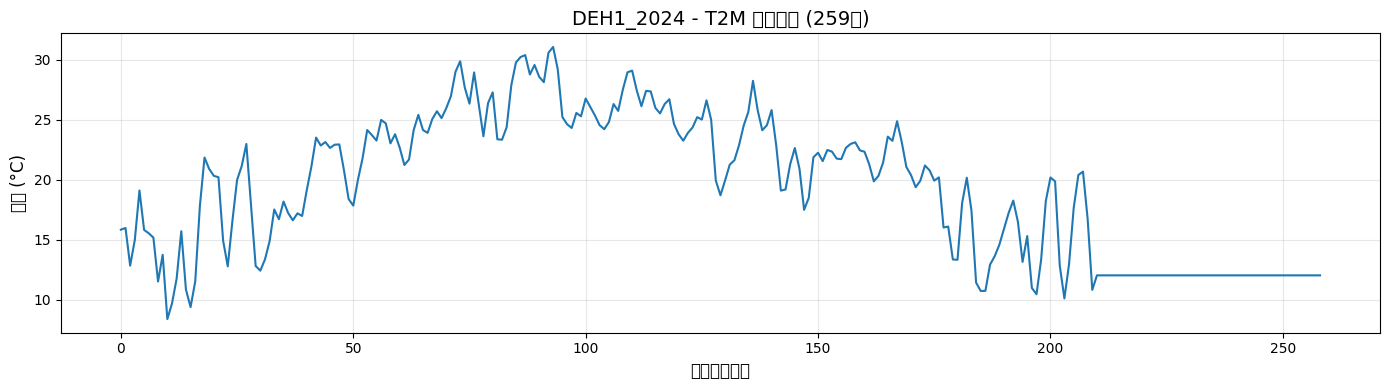

温度统计:
  最低: 8.41°C
  最高: 31.05°C
  平均: 19.38°C
  标准差: 5.85°C


In [10]:
# 7. 可视化某个特征的时间序列（以温度为例）
import matplotlib.pyplot as plt

# 选择第1个样本的温度数据
sample_idx = 0
temp_idx = 3  # T2M 温度

temp_series = weather_3d[sample_idx, :, temp_idx]

plt.figure(figsize=(14, 4))
plt.plot(temp_series, linewidth=1.5)
plt.title(f'{sample_ids[sample_idx]} - {feature_names[temp_idx]} 时间序列 (259天)', fontsize=14)
plt.xlabel('时间步（天）', fontsize=12)
plt.ylabel('温度 (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"温度统计:")
print(f"  最低: {temp_series.min():.2f}°C")
print(f"  最高: {temp_series.max():.2f}°C")
print(f"  平均: {temp_series.mean():.2f}°C")
print(f"  标准差: {temp_series.std():.2f}°C")

/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1937706594.py:28: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1937706594.py:28: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1937706594.py:28: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1937706594.py:28: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/1937706594.py:28: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmy

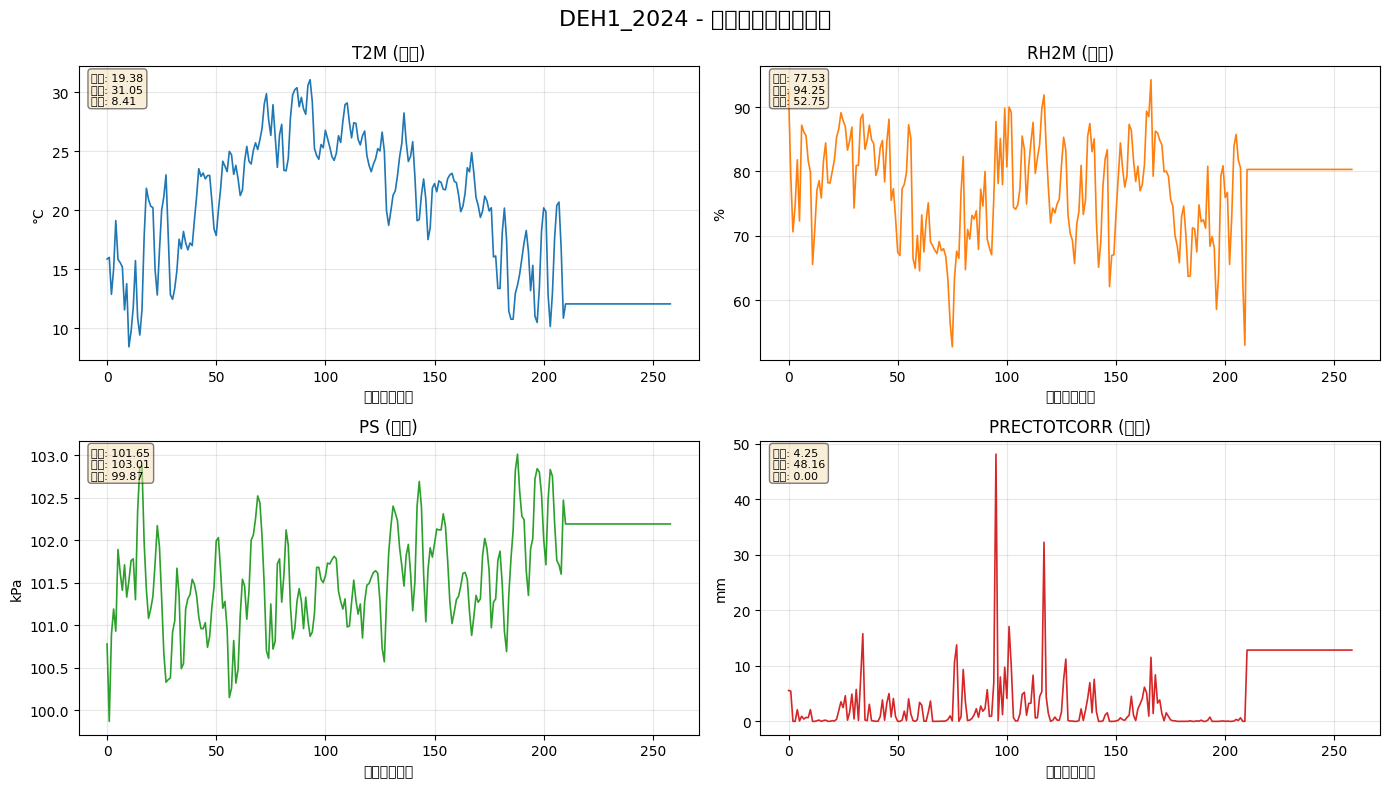

In [11]:
# 8. 可视化多个特征的时间序列对比
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle(f'{sample_ids[0]} - 多特征时间序列对比', fontsize=16)

# 选择4个特征进行对比
features_to_plot = [
    (3, 'T2M (温度)', '°C'),
    (1, 'RH2M (湿度)', '%'),
    (0, 'PS (气压)', 'kPa'),
    (10, 'PRECTOTCORR (降水)', 'mm')
]

for idx, (feat_idx, title, unit) in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    data_series = weather_3d[0, :, feat_idx]
    
    ax.plot(data_series, linewidth=1.2, color=f'C{idx}')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('时间步（天）', fontsize=10)
    ax.set_ylabel(unit, fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # 添加统计信息
    ax.text(0.02, 0.98, f'平均: {data_series.mean():.2f}\n最大: {data_series.max():.2f}\n最小: {data_series.min():.2f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=8)

plt.tight_layout()
plt.show()

/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/3959716702.py:12: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/3959716702.py:12: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/3959716702.py:12: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/3959716702.py:12: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmyx2wx4799z4k_mrv1pp3w0000gn/T/ipykernel_94777/3959716702.py:12: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jp/fxmy

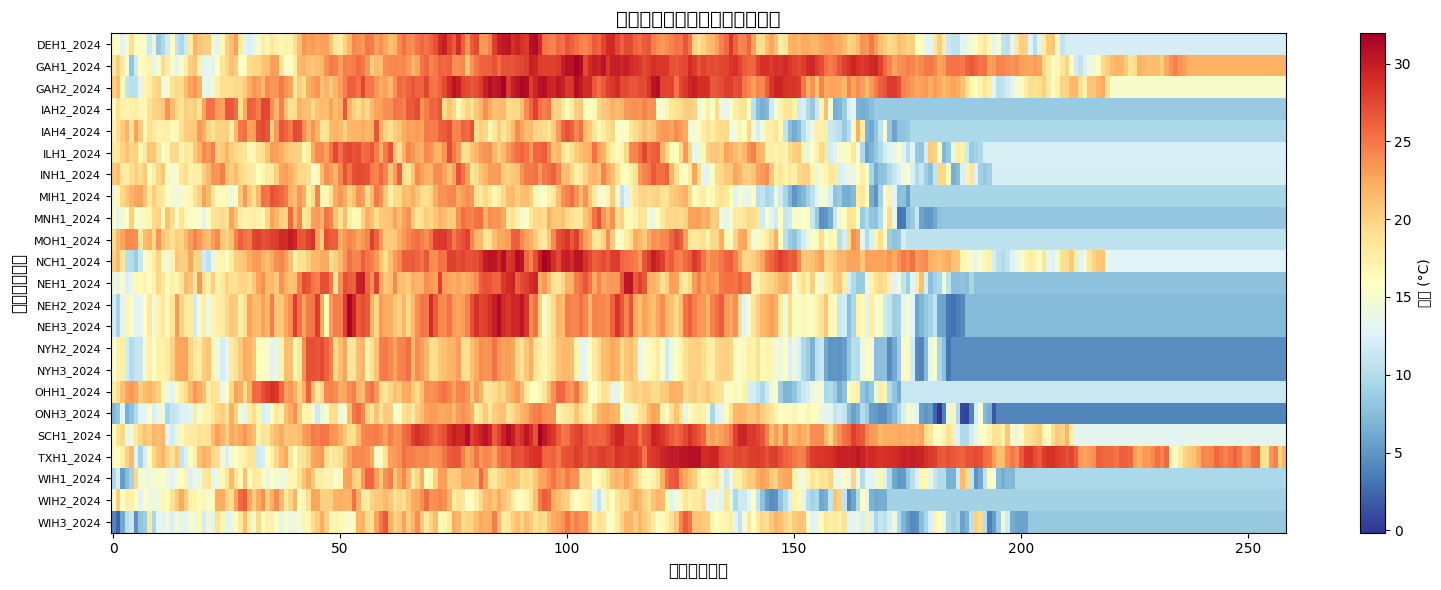

热力图说明:
  - 每一行代表一个环境的完整时间序列
  - 每一列代表某一天所有环境的温度
  - 颜色越红表示温度越高，越蓝表示温度越低


In [12]:
# 9. 查看所有样本所有时间步的热力图（以温度为例）
# 每行 = 一个样本，每列 = 一个时间步，颜色 = 温度值
temp_all_samples = weather_3d[:, :, 3]  # 所有样本的温度数据 (23, 259)

plt.figure(figsize=(16, 6))
plt.imshow(temp_all_samples, aspect='auto', cmap='RdYlBu_r', interpolation='nearest')
plt.colorbar(label='温度 (°C)')
plt.title('所有样本的温度时间序列热力图', fontsize=14)
plt.xlabel('时间步（天）', fontsize=12)
plt.ylabel('样本（环境）', fontsize=12)
plt.yticks(range(len(sample_ids)), sample_ids, fontsize=8)
plt.tight_layout()
plt.show()

print("热力图说明:")
print("  - 每一行代表一个环境的完整时间序列")
print("  - 每一列代表某一天所有环境的温度")
print("  - 颜色越红表示温度越高，越蓝表示温度越低")